# Selecting a URL Based on Weights

This notebook simulates `pick_url`, the weighted-random URL selector imported from `redirect.py`, and checks whether the resulting pick distribution matches the configured weights. We run two experiments: one with equal weights and one with unequal weights, comparing the actual pick counts against the expected counts derived from the weight ratios.

In [1]:
import sys
import pandas as pd

sys.path.insert(0, "../backend/lambda")
from redirect import pick_url

## Equal Weights

All five URLs carry the same weight, so each should be picked approximately 20% of the time.

In [2]:
targets = [
    {
        "url": "https://example1.com",
        "visits": 0,
        "weight": 1
    },
    {
        "url": "https://example2.com",
        "visits": 0,
        "weight": 1
    },
    {
        "url": "https://example3.com",
        "visits": 0,
        "weight": 1
    },
    {
        "url": "https://example4.com",
        "visits": 0,
        "weight": 1
    },
    {
        "url": "https://example5.com",
        "visits": 0,
        "weight": 1
    },
]

We run 1,000 picks and count visits per URL into a DataFrame.

In [3]:
N=1000

df = pd.DataFrame({"visits": 0}, index=[t["url"] for t in targets])
df.index.name = "url"

for _ in range(N):
    url = pick_url(targets)
    df.loc[url, "visits"] += 1

df

,visits
url,
https://example1.com,203
https://example2.com,193
https://example3.com,213
https://example4.com,207
https://example5.com,184


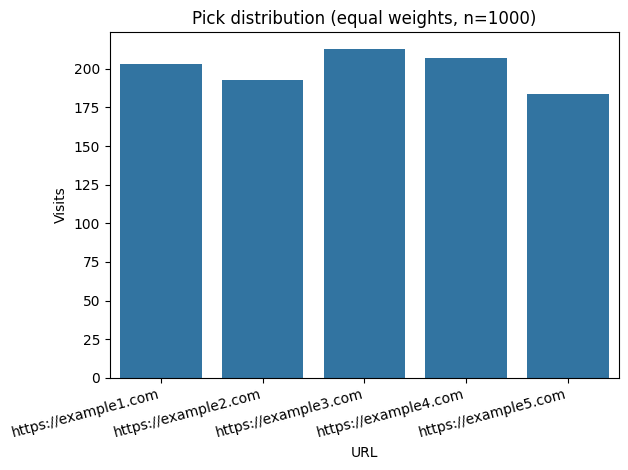

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df.reset_index(), x="url", y="visits", order=sorted(df.index))
plt.title(f"Pick distribution (equal weights, n={N})")
plt.xlabel("URL")
plt.ylabel("Visits")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()

## Unequal Weights

Now we assign distinct weights to three URLs and verify that `pick_url` honours them. For each URL we compute the **expected** pick count (`weight / total_weight × N`) and plot it alongside the **actual** count from the simulation.

In [5]:
weighted_targets = [
    {"url": "https://alpha.com",   "visits": 0, "weight": 60},
    {"url": "https://beta.com",    "visits": 0, "weight": 30},
    {"url": "https://gamma.com",   "visits": 0, "weight": 10},
]

In [6]:
N = 1000

df_weighted = pd.DataFrame(
    {"visits": 0, "weight": [t["weight"] for t in weighted_targets]},
    index=[t["url"] for t in weighted_targets],
)
df_weighted.index.name = "url"

for _ in range(N):
    url = pick_url(weighted_targets)
    df_weighted.loc[url, "visits"] += 1

total_weight = df_weighted["weight"].sum()
df_weighted["expected"] = df_weighted["weight"] / total_weight * N

df_weighted

,visits,weight,expected
url,,,
https://alpha.com,580,60,600.0
https://beta.com,316,30,300.0
https://gamma.com,104,10,100.0


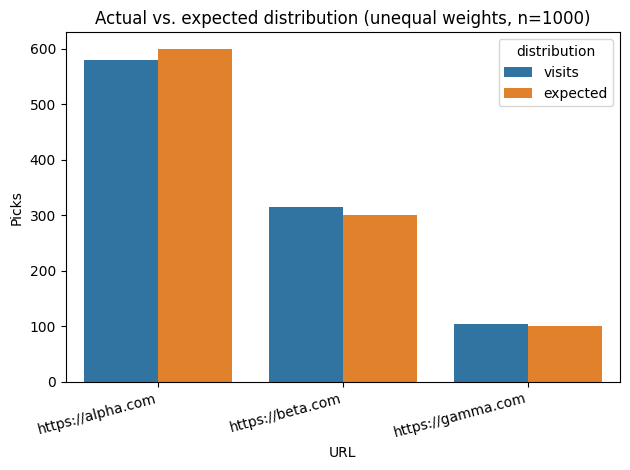

In [7]:
plot_df = (
    df_weighted[["visits", "expected"]]
    .reset_index()
    .melt(id_vars="url", var_name="distribution", value_name="count")
)

sns.barplot(
    data=plot_df,
    x="url",
    y="count",
    hue="distribution",
    order=sorted(df_weighted.index),
)
plt.title("Actual vs. expected distribution (unequal weights, n=1000)")
plt.xlabel("URL")
plt.ylabel("Picks")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()